In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%inline matplotlib
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\priya\anacondanew3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
UsageError: Line magic function `%inline` not found.


In [3]:
dataset=pd.read_csv('Market_Basket_Optimisation.csv', header=None)  # as we dont have headers
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
!pip install apyori   # association rule package

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=84e49b18bc5041381cd31aac4a768ea2b9ec44f08256ac02fd236f90779cdb18
  Stored in directory: c:\users\priya\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [5]:
from apyori import apriori

In [7]:
dataset.shape

(7501, 20)

In [8]:
# intention is to identify the opprotunities so customers purchase more.

### Data Preprocessing 

In [ ]:
# We are not worried about the missing data here as ot ia transactional data

In [9]:
transaction=[]
for i in range(0,7501):
    transaction.append([str(dataset.values[i,j]) for j in range(0,20)])

transaction=np.array(transaction)

In [11]:
print(transaction.shape)
print('******'*5)
print(transaction[0:20])

(7501, 20)
******************************
[['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
  'whole weat flour' 'yams' 'cottage cheese' 'energy drink'
  'tomato juice' 'low fat yogurt' 'green tea' 'honey' 'salad'
  'mineral water' 'salmon' 'antioxydant juice' 'frozen smoothie'
  'spinach' 'olive oil']
 ['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'

In [12]:
from wordcloud import WordCloud

In [1]:
wordcloud=WordCloud(width=1000,height=1000,max_words=20).generate(transaction)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('most popular items bought by customers',fontsize=35)
plt.show()


C:\Users\priya\anacondanew3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


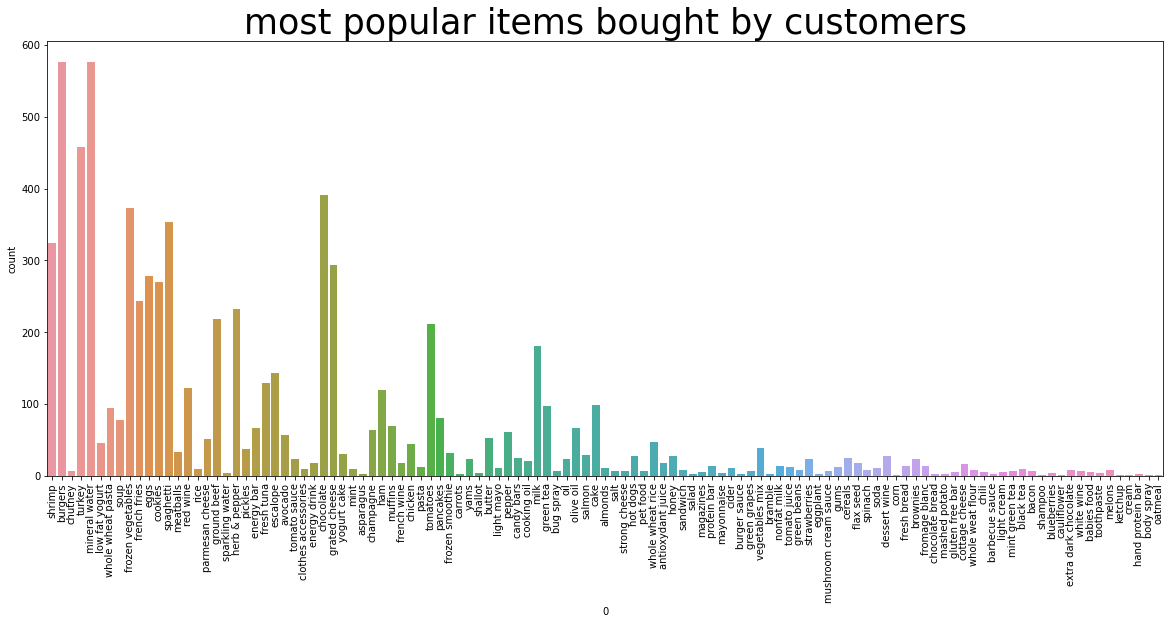

In [27]:
plt.rcParams['figure.figsize']=(20,8)
sns.countplot(dataset[0])
plt.xticks(rotation=90)
plt.title('most popular items bought by customers',fontsize=35)
plt.show()

In [16]:
dataset[0]

0              shrimp
1             burgers
2             chutney
3              turkey
4       mineral water
            ...      
7496           butter
7497          burgers
7498          chicken
7499         escalope
7500             eggs
Name: 0, Length: 7501, dtype: object

In [20]:
dataset[1]

0                 almonds
1               meatballs
2                     NaN
3                 avocado
4                    milk
              ...        
7496           light mayo
7497    frozen vegetables
7498                  NaN
7499            green tea
7500      frozen smoothie
Name: 1, Length: 7501, dtype: object

### Building Association rule mining

In [34]:
transaction=list(transaction)
rules=apriori(transaction,min_support=0.01,min_confidence=0.2,min_lift=2,min_length=2)

# support we shud give as less as possible
# confidenct we can give .2,.3.4 normally
# minimum length is like minimum 2 products customer have to buy

In [29]:
transaction

[array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
        'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
        'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
        'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
        'spinach', 'olive oil'], dtype='<U20'),
 array(['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan'], dtype='<U20'),
 array(['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan'], dtype='<U20'),
 array(['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan'], dtype='<U20'),
 array(['mineral water', 'milk', 'energy bar', 'whole wheat rice',
        'green tea', 'nan', 'na

In [31]:
rules

<generator object apriori at 0x000002400F99ACF0>

In [35]:
results=list(rules)

In [36]:
results

[RelationRecord(items=frozenset({'shrimp', 'frozen vegetables'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'ground beef', 'grated cheese'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro